## Venues Data Analysis of Paris and nearby Suburbs


In [2]:
import pandas as pd
import numpy as np
import requests
import folium
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

we will import data from 
https://data.iledefrance.fr/explore/dataset/base-comparateur-de-territoires/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B
this dataset included the department code, city code, GPS info, househould income information and etc. we will select only paris (department code 75) and its nearby suburbs(department code is 92, 93, 94)


In [6]:
idf_url = "https://data.iledefrance.fr/explore/dataset/base-comparateur-de-territoires/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"
idf_df = pd.read_csv(idf_url, delimiter=";")
idf_df.shape
idf_df.columns

Index(['CODGEO', 'LIBGEO', 'REG', 'DEP', 'P16_POP', 'P11_POP', 'SUPERF',
       'NAIS1116', 'DECE1116', 'P16_MEN', 'NAISD18', 'DECESD18', 'P16_LOG',
       'P16_RP', 'P16_RSECOCC', 'P16_LOGVAC', 'P16_RP_PROP', 'NBMENFISC16',
       'PIMP16', 'MED16', 'TP6016', 'P16_EMPLT', 'P16_EMPLT_SAL', 'P11_EMPLT',
       'P16_POP1564', 'P16_CHOM1564', 'P16_ACT1564', 'ETTOT15', 'ETAZ15',
       'ETBE15', 'ETFZ15', 'ETGU15', 'ETGZ15', 'ETOQ15', 'ETTEF115',
       'ETTEFP1015', 'Geo Shape', 'geo_point_2d'],
      dtype='object')

we will select the data(for data in DEP code 75, 92-94), and keep only column CODGEO, LIBGEO, DEP, SUPERF,MED16, GEO SHAPE, geo_point_2d

In [7]:
idf_df.rename(columns={'Geo Shape':'Geo_Shape'}, inplace=True)
columns = ["CODGEO", "LIBGEO", "DEP","SUPERF","MED16","Geo_Shape","geo_point_2d"]
paris_df = idf_df.loc[idf_df["DEP"].isin([75,92,93,94])]
paris_df = paris_df[columns].sort_values(by=['DEP','CODGEO'])
paris_df = paris_df.reset_index(drop=True)
paris_df

CODGEO                    LIBGEO  DEP  SUPERF         MED16  \
0     75101  Paris 1er Arrondissement   75    1.83  32697.333333   
1     75102   Paris 2e Arrondissement   75    0.99  30566.500000   
2     75103   Paris 3e Arrondissement   75    1.17  31333.000000   
3     75104   Paris 4e Arrondissement   75    1.60  31007.222222   
4     75105   Paris 5e Arrondissement   75    2.54  33169.333333   
..      ...                       ...  ...     ...           ...   
138   94077         Villeneuve-le-Roi   94    8.40  20538.666667   
139   94078  Villeneuve-Saint-Georges   94    8.75  15593.809524   
140   94079        Villiers-sur-Marne   94    4.33  21288.000000   
141   94080                 Vincennes   94    1.91  31450.666667   
142   94081           Vitry-sur-Seine   94   11.67  17943.333333   

                                             Geo_Shape  \
0    {"type": "Polygon", "coordinates": [[[2.325761...   
1    {"type": "Polygon", "coordinates": [[[2.350841...   
2    {"type": "Polygon", "coordinates": [[[2.350091...   
3    {"type": "Polygon", "coordinates": [[[2.344559...   
4    {"type": "Polygon", "coordinates": [[[2.344559...   
..                                                 ...   
138  {"type": "Polygon", "coordinates": [[[2.435128...   
139  {"type": "Polygon", "coordinates": [[[2.427522...   
140  {"type": "Polygon", "coordinates": [[[2.557404...   
141  {"type": "Polygon", "coordinates": [[[2.418968...   
142  {"type": "Polygon", "coordinates": [[[2.371166...   

                    geo_point_2d  
0    48.8625262113,2.33630086091  
1    48.8682182328,2.34268958705  
2    48.8628851439,2.35993164256  
3    48.8542874923,2.35759608216  
4    48.8444087298,2.35049826182  
..                           ...  
138  48.7321607291,2.41097949758  
139   48.742053977,2.44909554799  
140   48.8263001327,2.5453774964  
141  48.8472864946,2.43799511731  
142  48.7884475501,2.39447413132  

[143 rows x 7 columns]

save result to csv file

In [10]:
paris_df.to_csv("pd_paris_geo.csv", index=False)

### Explore Ile de France data  
box plot to check the surface of cities grouped by department

[(0.0, 30.0)]

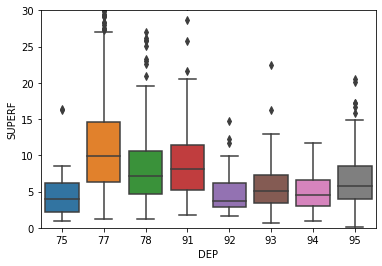

In [11]:
ax = sns.boxplot(x="DEP", y="SUPERF", data=idf_df)
ax.set(ylim=(0, 30)) # we set y range from 0 to 30, since there are some outlier have huge values

As box plot showed, the 4 deparments (75, 92-94) in the petite couronne has smaller city size than other departement(77,78, 91,95)
let check the desity of city in the ile de france this time

In [12]:
idf_df["density"] = idf_df["P16_POP"]/idf_df["SUPERF"]
ax = sns.boxplot(x="DEP", y="density", data=idf_df).set_title('Ile de France: Population Desity')


the above data showed that the population density in petite couronne(75, 92-94) is much higher than other 4 departments.

Now, we will check the revenu distribution, MED16 is the median value of level of live, level of live is the household revnud divise par family part

In [7]:
ax = sns.boxplot(x="DEP", y="MED16", data=idf_df, showmeans=True)

In [8]:
ax = sns.violinplot(x="DEP", y="MED16", data=paris_df)

the result show that, deparment 93 has the lowest household median revenu, and the difference between department 93 and other 3 departments. Paris has highest m

In [13]:
paris_df.head()

CODGEO                    LIBGEO  DEP  SUPERF         MED16  \
0   75101  Paris 1er Arrondissement   75    1.83  32697.333333   
1   75102   Paris 2e Arrondissement   75    0.99  30566.500000   
2   75103   Paris 3e Arrondissement   75    1.17  31333.000000   
3   75104   Paris 4e Arrondissement   75    1.60  31007.222222   
4   75105   Paris 5e Arrondissement   75    2.54  33169.333333   

                                           Geo_Shape  \
0  {"type": "Polygon", "coordinates": [[[2.325761...   
1  {"type": "Polygon", "coordinates": [[[2.350841...   
2  {"type": "Polygon", "coordinates": [[[2.350091...   
3  {"type": "Polygon", "coordinates": [[[2.344559...   
4  {"type": "Polygon", "coordinates": [[[2.344559...   

                  geo_point_2d  
0  48.8625262113,2.33630086091  
1  48.8682182328,2.34268958705  
2  48.8628851439,2.35993164256  
3  48.8542874923,2.35759608216  
4  48.8444087298,2.35049826182

We will use folim to draw a Choropleth map to see the populuation desity

In [15]:
idf_df_map = idf_df[["CODGEO", "LIBGEO","MED16","Geo_Shape","geo_point_2d", "density"]]
idf_df_map.rename(columns={'Geo_Shape':'geometry'}, inplace=True)

In [12]:
idf_geo = idf_df_map[["CODGEO", "geometry"]].to_json(orient='values')
idf_geo = json.loads(idf_geo)
#print(idf_geo)
idf_geo_dict = {}
idf_geo_dict["type"] = "FeatureCollection"
idf_geo_dict["features"] = []
for record in idf_geo:
    feature = {}
    feature["type"] = "Feature"
    feature["properties"] = dict(CODGEO=record[0])
    feature["geometry"] = json.loads(record[1])
    idf_geo_dict["features"].append(feature)
    

with open('idf_geo.json', 'w') as json_file:
    json.dump(idf_geo_dict, json_file) 


In [13]:
m = folium.Map(location=[48.866667,  2.333333], zoom_start=10)


In [14]:
idf_geo = r'idf_geo.json'
folium.Choropleth(
    geo_data=idf_geo,
    name='choropleth',
    data=idf_df_map,
    columns=['CODGEO', 'density'],
    key_on='feature.properties.CODGEO',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Density',
    reset=True
).add_to(m)
m

the above map we can see a high density area, which is petite couronnes zone

In [15]:
m = folium.Map(location=[48.866667,  2.333333], zoom_start=9)

In [16]:
idf_geo = r'idf_geo.json'
bins = list(idf_df_map['MED16'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]))
folium.Choropleth(
    geo_data=idf_geo,
    name='choropleth',
    data=idf_df_map,
    columns=['CODGEO', 'MED16'],
    key_on='feature.properties.CODGEO',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Median Starndard of Living',
    bins=bins,
    reset=True
).add_to(m)
m

In [92]:
bins

[13025.7692308,
 22209.6,
 24178.547619060002,
 25856.000000019998,
 27919.678787900004,
 43848.6666667]

## use foursquare API to get the venues recommendations

In [16]:
paris_df = pd.read_csv("pd_paris_geo.csv")
paris_df[['latitude','longitude']] = paris_df.geo_point_2d.str.split(",", expand=True)
paris_df.drop("geo_point_2d", axis=1, inplace=True)
paris_df.head()

CODGEO                    LIBGEO  DEP  SUPERF         MED16  \
0   75101  Paris 1er Arrondissement   75    1.83  32697.333333   
1   75102   Paris 2e Arrondissement   75    0.99  30566.500000   
2   75103   Paris 3e Arrondissement   75    1.17  31333.000000   
3   75104   Paris 4e Arrondissement   75    1.60  31007.222222   
4   75105   Paris 5e Arrondissement   75    2.54  33169.333333   

                                           Geo_Shape       latitude  \
0  {"type": "Polygon", "coordinates": [[[2.325761...  48.8625262113   
1  {"type": "Polygon", "coordinates": [[[2.350841...  48.8682182328   
2  {"type": "Polygon", "coordinates": [[[2.350091...  48.8628851439   
3  {"type": "Polygon", "coordinates": [[[2.344559...  48.8542874923   
4  {"type": "Polygon", "coordinates": [[[2.344559...  48.8444087298   

       longitude  
0  2.33630086091  
1  2.34268958705  
2  2.35993164256  
3  2.35759608216  
4  2.35049826182

In [58]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [76]:
def getNearbyVenues(CODGEOs, latitudes, longitudes, LIMIT=100):
    
    venues_list=[]
    for CODGEO, lat, lng in zip(CODGEOs, latitudes, longitudes):
        print(CODGEO)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            CODGEO, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['CODGEO', 
                  'City_Latitude', 
                  'City_Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [77]:
paris_venues = getNearbyVenues(CODGEOs=paris_df['CODGEO'],
                                   latitudes=paris_df['latitude'],
                                   longitudes=paris_df['longitude'])

75101
75102
75103
75104
75105
75106
75107
75108
75109
75110
75111
75112
75113
75114
75115
75116
75117
75118
75119
75120
92002
92004
92007
92009
92012
92014
92019
92020
92022
92023
92024
92025
92026
92032
92033
92035
92036
92040
92044
92046
92047
92048
92049
92050
92051
92060
92062
92063
92064
92071
92072
92073
92075
92076
92077
92078
93001
93005
93006
93007
93008
93010
93013
93014
93015
93027
93029
93030
93031
93032
93033
93039
93045
93046
93047
93048
93049
93050
93051
93053
93055
93057
93059
93061
93062
93063
93064
93066
93070
93071
93072
93073
93074
93077
93078
93079
94001
94002
94003
94004
94011
94015
94016
94017
94018
94019
94021
94022
94028
94033
94034
94037
94038
94041
94042
94043
94044
94046
94047
94048
94052
94053
94054
94055
94056
94058
94059
94060
94065
94067
94068
94069
94070
94071
94073
94074
94075
94076
94077
94078
94079
94080
94081


In [17]:
print(paris_venues.shape)
paris_venues.head()

(12974, 7)


CODGEO  City_Latitude  City_Longitude                               Venue  \
0   75101      48.862526        2.336301                     Musée du Louvre   
1   75101      48.862526        2.336301                        Palais Royal   
2   75101      48.862526        2.336301                   Comédie-Française   
3   75101      48.862526        2.336301  Vestige de la Forteresse du Louvre   
4   75101      48.862526        2.336301              La Clef Louvre Paris     

   Venue Latitude  Venue Longitude Venue Category  
0       48.860847         2.336440     Art Museum  
1       48.863236         2.337127  Historic Site  
2       48.863088         2.336612        Theater  
3       48.861577         2.333508  Historic Site  
4       48.863977         2.336140          Hotel

Save Paris Venus result

In [18]:
paris_venues.to_csv('paris_venues.csv', sep=';', index=False)


In [20]:
paris_venues = pd.read_csv('paris_venues.csv', sep=';')
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['CODGEO'] = paris_venues['CODGEO'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]
paris_onehot.head()

CODGEO  Accessories Store  Afghan Restaurant  African Restaurant  Airport  \
0   75101                  0                  0                   0        0   
1   75101                  0                  0                   0        0   
2   75101                  0                  0                   0        0   
3   75101                  0                  0                   0        0   
4   75101                  0                  0                   0        0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  ...  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0             0  ...                              0                      0   
1             0  ...                              0                      0   
2             0  ...                              0                      0   
3             0  ...                              0                      0   
4             0  ...                              0                      0   

   Vineyard  Water Park  Wine Bar  Wine Shop  Women's Store  Yoga Studio  Zoo  \
0         0           0         0          0              0            0    0   
1         0           0         0          0              0            0    0   
2         0           0         0          0              0            0    0   
3         0           0         0          0              0            0    0   
4         0           0         0          0              0            0    0   

   Zoo Exhibit  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 331 columns]

In [21]:
paris_grouped = paris_onehot.groupby('CODGEO').mean().reset_index()
paris_grouped.head()

CODGEO  Accessories Store  Afghan Restaurant  African Restaurant  Airport  \
0   75101                0.0                0.0                0.00      0.0   
1   75102                0.0                0.0                0.00      0.0   
2   75103                0.0                0.0                0.00      0.0   
3   75104                0.0                0.0                0.01      0.0   
4   75105                0.0                0.0                0.00      0.0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0             0.0              0.0               0.0                  0.0   
1             0.0              0.0               0.0                  0.0   
2             0.0              0.0               0.0                  0.0   
3             0.0              0.0               0.0                  0.0   
4             0.0              0.0               0.0                  0.0   

   Antique Shop  ...  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0           0.0  ...                           0.00                   0.00   
1           0.0  ...                           0.00                   0.00   
2           0.0  ...                           0.01                   0.03   
3           0.0  ...                           0.00                   0.00   
4           0.0  ...                           0.00                   0.02   

   Vineyard  Water Park  Wine Bar  Wine Shop  Women's Store  Yoga Studio  \
0       0.0         0.0      0.03       0.01           0.01          0.0   
1       0.0         0.0      0.07       0.01           0.02          0.0   
2       0.0         0.0      0.05       0.02           0.00          0.0   
3       0.0         0.0      0.03       0.00           0.00          0.0   
4       0.0         0.0      0.02       0.01           0.00          0.0   

    Zoo  Zoo Exhibit  
0  0.00         0.00  
1  0.00         0.00  
2  0.00         0.00  
3  0.00         0.00  
4  0.01         0.01  

[5 rows x 331 columns]

In [29]:
paris_grouped.to_csv('paris_grouped.csv', sep=';', index=False)

Now check the top 10 venues in each cities

In [22]:
paris_grouped = pd.read_csv("paris_grouped.csv", sep=';')
paris_grouped.head()

CODGEO  Accessories Store  Afghan Restaurant  African Restaurant  Airport  \
0   75101                0.0                0.0                0.00      0.0   
1   75102                0.0                0.0                0.00      0.0   
2   75103                0.0                0.0                0.00      0.0   
3   75104                0.0                0.0                0.01      0.0   
4   75105                0.0                0.0                0.00      0.0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0             0.0              0.0               0.0                  0.0   
1             0.0              0.0               0.0                  0.0   
2             0.0              0.0               0.0                  0.0   
3             0.0              0.0               0.0                  0.0   
4             0.0              0.0               0.0                  0.0   

   Antique Shop  ...  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0           0.0  ...                           0.00                   0.00   
1           0.0  ...                           0.00                   0.00   
2           0.0  ...                           0.01                   0.03   
3           0.0  ...                           0.00                   0.00   
4           0.0  ...                           0.00                   0.02   

   Vineyard  Water Park  Wine Bar  Wine Shop  Women's Store  Yoga Studio  \
0       0.0         0.0      0.03       0.01           0.01          0.0   
1       0.0         0.0      0.07       0.01           0.02          0.0   
2       0.0         0.0      0.05       0.02           0.00          0.0   
3       0.0         0.0      0.03       0.00           0.00          0.0   
4       0.0         0.0      0.02       0.01           0.00          0.0   

    Zoo  Zoo Exhibit  
0  0.00         0.00  
1  0.00         0.00  
2  0.00         0.00  
3  0.00         0.00  
4  0.01         0.01  

[5 rows x 331 columns]

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['CODGEO']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['CODGEO'] = paris_grouped['CODGEO']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted

CODGEO 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     75101     French Restaurant   Japanese Restaurant    Italian Restaurant   
1     75102     French Restaurant              Wine Bar          Cocktail Bar   
2     75103     French Restaurant              Wine Bar           Coffee Shop   
3     75104     French Restaurant        Ice Cream Shop        Clothing Store   
4     75105     French Restaurant                 Plaza                Bakery   
..      ...                   ...                   ...                   ...   
138   94077           Supermarket                 Hotel     Electronics Store   
139   94078           Supermarket  Fast Food Restaurant         Train Station   
140   94079           Supermarket  Fast Food Restaurant     French Restaurant   
141   94080     French Restaurant    Italian Restaurant   Japanese Restaurant   
142   94081           Supermarket  Fast Food Restaurant         Train Station   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                   Plaza                 Hotel              Wine Bar   
1                   Hotel                Bistro                Bakery   
2             Art Gallery   Japanese Restaurant          Cocktail Bar   
3                   Plaza                 Hotel                Garden   
4             Coffee Shop    Italian Restaurant                Museum   
..                    ...                   ...                   ...   
138         Shopping Mall  Fast Food Restaurant        Sandwich Place   
139         Shopping Mall        Clothing Store                 Hotel   
140         Train Station                 Hotel    Italian Restaurant   
141            Restaurant                 Hotel           Supermarket   
142     French Restaurant                 Hotel      Asian Restaurant   

      7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
0               Coffee Shop            Art Museum          Historic Site   
1        Italian Restaurant              Creperie                    Bar   
2              Gourmet Shop        Sandwich Place           Burger Joint   
3                  Wine Bar              Tea Room       Pedestrian Plaza   
4                     Hotel        Science Museum  Vietnamese Restaurant   
..                      ...                   ...                    ...   
138                  Market           Coffee Shop             Steakhouse   
139          Sandwich Place      Department Store         Soccer Stadium   
140  Furniture / Home Store           Pizza Place      Electronics Store   
141                  Bakery        Cosmetics Shop              Bookstore   
142    Gym / Fitness Center    Italian Restaurant                   Park   

    10th Most Common Venue  
0                  Theater  
1              Salad Place  
2    Vietnamese Restaurant  
3             Gourmet Shop  
4         Greek Restaurant  
..                     ...  
138                 Bakery  
139       Asian Restaurant  
140          Shopping Mall  
141                   Park  
142    Japanese Restaurant  

[143 rows x 11 columns]

In [32]:
paris_venues_sorted.to_csv('paris_venues_sorted.csv', sep=';', index=False)


### Below we will use the Kmeans to cluster the citied in the petite couronne area 
we will first try to use the elbow method to find the K value

In [22]:
paris_grouped_df = pd.read_csv('paris_grouped.csv', delimiter=";")
paris_grouped_df.head()
paris_grouped_df.shape

(143, 331)

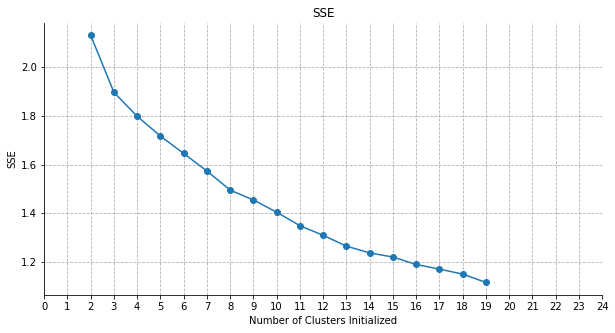

In [12]:
paris_grouped_clustering = paris_grouped_df.drop('CODGEO', 1)


MSE = []  
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=0)  
    km.fit(paris_grouped_clustering)
    MSE.append(km.inertia_)
# inertia_:Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,5))   
plt.plot(range(2,20),MSE,'o-')
plt.xticks(range(0,25,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel('SSE')
plt.title("SSE")
sns.despine()

it looks like K=3 is a suitble value for the Kmeans clusterning


In [13]:
km = KMeans(n_clusters=3, random_state=0)  
km.fit(paris_grouped_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Let add the cluster label to the cities

In [33]:
paris_venues_sorted.insert(0, 'Cluster Labels', km.labels_)
paris_venues_sorted.head()

Cluster Labels  CODGEO 1st Most Common Venue 2nd Most Common Venue  \
0               0   75101     French Restaurant   Japanese Restaurant   
1               0   75102     French Restaurant              Wine Bar   
2               0   75103     French Restaurant              Wine Bar   
3               0   75104     French Restaurant        Ice Cream Shop   
4               0   75105     French Restaurant                 Plaza   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Italian Restaurant                 Plaza                 Hotel   
1          Cocktail Bar                 Hotel                Bistro   
2           Coffee Shop           Art Gallery   Japanese Restaurant   
3        Clothing Store                 Plaza                 Hotel   
4                Bakery           Coffee Shop    Italian Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0              Wine Bar           Coffee Shop            Art Museum   
1                Bakery    Italian Restaurant              Creperie   
2          Cocktail Bar          Gourmet Shop        Sandwich Place   
3                Garden              Wine Bar              Tea Room   
4                Museum                 Hotel        Science Museum   

   9th Most Common Venue 10th Most Common Venue  
0          Historic Site                Theater  
1                    Bar            Salad Place  
2           Burger Joint  Vietnamese Restaurant  
3       Pedestrian Plaza           Gourmet Shop  
4  Vietnamese Restaurant       Greek Restaurant

In [21]:
paris_merged = paris_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(paris_venues_sorted.set_index('CODGEO'), on='CODGEO')

paris_merged.head() 

NameError: name 'paris_venues_sorted' is not defined

In [20]:
paris_merged.to_csv('paris_merged.csv', sep=";",index=False)

we will see the cluster in the map

In [45]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[48.8625262113, 2.33630086091], zoom_start=11)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


idf_geo = r'idf_geo.json'
bins = list(idf_df_map['MED16'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]))
folium.Choropleth(
    geo_data=idf_geo,
    name='choropleth',
    data=idf_df_map,
    columns=['CODGEO', 'MED16'],
    key_on='feature.properties.CODGEO',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Density',
    bins=bins,
    reset=True
).add_to(map_clusters)



# add markers to the map
markers_colors = []
for lat_lon, poi, cluster in zip(paris_merged["geo_point_2d"], paris_merged['LIBGEO'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        lat_lon.split(","),
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

From map, we can see that it look like there is relation with revenu and clustering.
we will check the each cluster label to see what are this clustering 

In [27]:
paris_venues = pd.read_csv('paris_venues.csv', sep=';')
paris_merged = pd.read_csv('paris_merged.csv', sep=";")
paris_venues_label = paris_venues.merge(paris_merged[["CODGEO","LIBGEO", "Cluster Labels"]], on="CODGEO")

In [4]:
paris_venues_label

CODGEO  City_Latitude  City_Longitude  \
0       75101      48.862526        2.336301   
1       75101      48.862526        2.336301   
2       75101      48.862526        2.336301   
3       75101      48.862526        2.336301   
4       75101      48.862526        2.336301   
...       ...            ...             ...   
12969   94081      48.788448        2.394474   
12970   94081      48.788448        2.394474   
12971   94081      48.788448        2.394474   
12972   94081      48.788448        2.394474   
12973   94081      48.788448        2.394474   

                                    Venue  Venue Latitude  Venue Longitude  \
0                         Musée du Louvre       48.860847         2.336440   
1                            Palais Royal       48.863236         2.337127   
2                       Comédie-Française       48.863088         2.336612   
3      Vestige de la Forteresse du Louvre       48.861577         2.333508   
4                  La Clef Louvre Paris         48.863977         2.336140   
...                                   ...             ...              ...   
12969                           La Comète       48.809438         2.362386   
12970                     Balladins Hotel       48.782050         2.353541   
12971                          King Jouet       48.758702         2.385726   
12972                         Cache Cache       48.758322         2.386469   
12973                               Fuxia       48.757306         2.386791   

           Venue Category                    LIBGEO  Cluster Labels  
0              Art Museum  Paris 1er Arrondissement               0  
1           Historic Site  Paris 1er Arrondissement               0  
2                 Theater  Paris 1er Arrondissement               0  
3           Historic Site  Paris 1er Arrondissement               0  
4                   Hotel  Paris 1er Arrondissement               0  
...                   ...                       ...             ...  
12969          Restaurant           Vitry-sur-Seine               1  
12970               Hotel           Vitry-sur-Seine               1  
12971    Toy / Game Store           Vitry-sur-Seine               1  
12972      Clothing Store           Vitry-sur-Seine               1  
12973  Italian Restaurant           Vitry-sur-Seine               1  

[12974 rows x 9 columns]

In [60]:
pivot_table_paris = pd.pivot_table(paris_venues_label[["Cluster Labels","CODGEO","Venue Category"]], index=['Cluster Labels'],columns=['Venue Category'], aggfunc='count')

In [70]:
pivot_table_paris.fillna(0)


CODGEO                                               \
Venue Category Accessories Store Afghan Restaurant African Restaurant Airport   
Cluster Labels                                                                  
0                            0.0               1.0               14.0     0.0   
1                            0.0               0.0                0.0    11.0   
2                            2.0               0.0                7.0     0.0   

                                                                \
Venue Category Airport Lounge Airport Service Airport Terminal   
Cluster Labels                                                   
0                         0.0             0.0              0.0   
1                         3.0             0.0              1.0   
2                        21.0             5.0              0.0   

                                                          ...  \
Venue Category American Restaurant Antique Shop Aquarium  ...   
Cluster Labels                                            ...   
0                              7.0          1.0      2.0  ...   
1                              9.0          0.0      0.0  ...   
2                              8.0          0.0      2.0  ...   

                                                                             \
Venue Category Vegetarian / Vegan Restaurant Vietnamese Restaurant Vineyard   
Cluster Labels                                                                
0                                        9.0                  19.0      1.0   
1                                        2.0                   1.0      0.0   
2                                        3.0                  45.0      0.0   

                                                                             \
Venue Category Water Park Wine Bar Wine Shop Women's Store Yoga Studio  Zoo   
Cluster Labels                                                                
0                     1.0     45.0      19.0           4.0         1.0  3.0   
1                     0.0      1.0       0.0           3.0         0.0  1.0   
2                     0.0      8.0       4.0           0.0         0.0  2.0   

                            
Venue Category Zoo Exhibit  
Cluster Labels              
0                      4.0  
1                      1.0  
2                      2.0  

[3 rows x 330 columns]

In [71]:
pivot_table_paris.iloc[0].sort_values(ascending=False).head(10)


        Venue Category     
CODGEO  French Restaurant      550.0
        Hotel                  160.0
        Italian Restaurant     153.0
        Bakery                 132.0
        Japanese Restaurant    121.0
        Bar                     86.0
        Plaza                   81.0
        Bistro                  77.0
        Park                    72.0
        Supermarket             69.0
Name: 0, dtype: float64

In [72]:
pivot_table_paris.iloc[1].sort_values(ascending=False).head(10)

        Venue Category        
CODGEO  Supermarket               615.0
        Fast Food Restaurant      468.0
        Train Station             301.0
        Hotel                     289.0
        Shopping Mall             175.0
        French Restaurant         151.0
        Park                      145.0
        Clothing Store            143.0
        Furniture / Home Store    122.0
        Bakery                    111.0
Name: 1, dtype: float64

In [73]:
pivot_table_paris.iloc[2].sort_values(ascending=False).head(10)

        Venue Category     
CODGEO  Supermarket            339.0
        Hotel                  302.0
        French Restaurant      287.0
        Park                   183.0
        Japanese Restaurant    155.0
        Bakery                 152.0
        Italian Restaurant     145.0
        Sandwich Place         100.0
        Train Station           88.0
        Pizza Place             78.0
Name: 2, dtype: float64

In [78]:
pivot_table_paris.iloc[0].sort_values(ascending=False).head(10).divide(pivot_table_paris.iloc[0].sum())

        Venue Category     
CODGEO  French Restaurant      0.163934
        Hotel                  0.047690
        Italian Restaurant     0.045604
        Bakery                 0.039344
        Japanese Restaurant    0.036066
        Bar                    0.025633
        Plaza                  0.024143
        Bistro                 0.022951
        Park                   0.021461
        Supermarket            0.020566
Name: 0, dtype: float64

In [79]:
pivot_table_paris.iloc[1].sort_values(ascending=False).head(10).divide(pivot_table_paris.iloc[1].sum())

        Venue Category        
CODGEO  Supermarket               0.118201
        Fast Food Restaurant      0.089948
        Train Station             0.057851
        Hotel                     0.055545
        Shopping Mall             0.033634
        French Restaurant         0.029022
        Park                      0.027869
        Clothing Store            0.027484
        Furniture / Home Store    0.023448
        Bakery                    0.021334
Name: 1, dtype: float64

In [81]:
pivot_table_paris.iloc[2].sort_values(ascending=False).head(10).divide(pivot_table_paris.iloc[2].sum())

        Venue Category     
CODGEO  Supermarket            0.076766
        Hotel                  0.068388
        French Restaurant      0.064991
        Park                   0.041440
        Japanese Restaurant    0.035100
        Bakery                 0.034420
        Italian Restaurant     0.032835
        Sandwich Place         0.022645
        Train Station          0.019928
        Pizza Place            0.017663
Name: 2, dtype: float64

we will check the box plot to see the each label revenus distribution

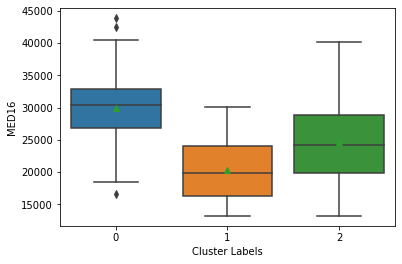

In [29]:
paris_merged

ax = sns.boxplot(x="Cluster Labels", y="MED16", data=paris_merged, showmeans=True)


In [32]:
paris_merged['MED16'].hist(bins=10)

find the outliner cities in the clusters 0

In [36]:
paris_merged[paris_merged["Cluster Labels"]==0].sort_values(by=['MED16'], ascending=False)

Unnamed: 0  CODGEO                    LIBGEO  DEP  SUPERF         MED16  \
44           44   92051         Neuilly-sur-Seine   92    3.73  43848.666667   
6             6   75107   Paris 7e Arrondissement   75    4.09  42465.555556   
7             7   75108   Paris 8e Arrondissement   75    3.88  40540.000000   
5             5   75106   Paris 6e Arrondissement   75    2.15  39062.666667   
15           15   75116  Paris 16e Arrondissement   75   16.37  38387.000000   
48           48   92064               Saint-Cloud   92    7.56  36616.000000   
54           54   92077             Ville-d'Avray   92    3.67  35338.260870   
8             8   75109   Paris 9e Arrondissement   75    2.18  33258.000000   
4             4   75105   Paris 5e Arrondissement   75    2.54  33169.333333   
0             0   75101  Paris 1er Arrondissement   75    1.83  32697.333333   
129         129   94067               Saint-Mandé   94    0.92  32074.666667   
24           24   92012      Boulogne-Billancourt   92    6.17  31777.333333   
141         141   94080                 Vincennes   94    1.91  31450.666667   
2             2   75103   Paris 3e Arrondissement   75    1.17  31333.000000   
3             3   75104   Paris 4e Arrondissement   75    1.60  31007.222222   
50           50   92072                    Sèvres   92    3.91  30755.000000   
1             1   75102   Paris 2e Arrondissement   75    0.99  30566.500000   
14           14   75115  Paris 15e Arrondissement   75    8.48  30448.000000   
37           37   92040       Issy-les-Moulineaux   92    4.25  30422.000000   
16           16   75117  Paris 17e Arrondissement   75    5.67  30281.500000   
32           32   92026                Courbevoie   92    4.17  29389.130435   
51           51   92073                  Suresnes   92    3.79  28370.740741   
52           52   92075                    Vanves   92    1.56  27857.000000   
13           13   75114  Paris 14e Arrondissement   75    5.64  27287.600000   
11           11   75112  Paris 12e Arrondissement   75   16.32  27110.000000   
46           46   92062                   Puteaux   92    3.19  26975.700000   
10           10   75111  Paris 11e Arrondissement   75    3.67  26810.333333   
9             9   75110  Paris 10e Arrondissement   75    2.89  25618.000000   
39           39   92046                  Malakoff   92    2.07  23087.222222   
72           72   93045                 Les Lilas   93    1.26  22545.833333   
17           17   75118  Paris 18e Arrondissement   75    6.01  21541.739130   
19           19   75120  Paris 20e Arrondissement   75    5.98  21017.333333   
83           83   93061      Le Pré-Saint-Gervais   93    0.70  19256.500000   
75           75   93048                 Montreuil   93    8.92  18428.000000   
58           58   93006                  Bagnolet   93    2.57  16583.000000   

                                             Geo_Shape  \
44   {"type": "Polygon", "coordinates": [[[2.284459...   
6    {"type": "Polygon", "coordinates": [[[2.320777...   
7    {"type": "Polygon", "coordinates": [[[2.327120...   
5    {"type": "Polygon", "coordinates": [[[2.316628...   
15   {"type": "Polygon", "coordinates": [[[2.225670...   
48   {"type": "Polygon", "coordinates": [[[2.225670...   
54   {"type": "Polygon", "coordinates": [[[2.161277...   
8    {"type": "Polygon", "coordinates": [[[2.325761...   
4    {"type": "Polygon", "coordinates": [[[2.344559...   
0    {"type": "Polygon", "coordinates": [[[2.325761...   
129  {"type": "Polygon", "coordinates": [[[2.427575...   
24   {"type": "Polygon", "coordinates": [[[2.224219...   
141  {"type": "Polygon", "coordinates": [[[2.418968...   
2    {"type": "Polygon", "coordinates": [[[2.350091...   
3    {"type": "Polygon", "coordinates": [[[2.344559...   
50   {"type": "Polygon", "coordinates": [[[2.205507...   
1    {"type": "Polygon", "coordinates": [[[2.350841...   
14   {"type": "Polygon", "coordinates": [[[2.289778...   
37   {"type": "Polygon

In [37]:
paris_merged[paris_merged["Cluster Labels"]==2].sort_values(by=['MED16'], ascending=False)

Unnamed: 0  CODGEO                    LIBGEO  DEP  SUPERF         MED16  \
40           40   92047        Marnes-la-Coquette   92    3.48  40190.400000   
53           53   92076                Vaucresson   92    3.08  38694.444444   
34           34   92033                   Garches   92    2.69  33548.571429   
49           49   92071                    Sceaux   92    3.60  33503.000000   
25           25   92014            Bourg-la-Reine   92    1.86  31038.666667   
38           38   92044          Levallois-Perret   92    2.41  30930.666667   
120         120   94052          Nogent-sur-Marne   94    2.80  30241.666667   
47           47   92063           Rueil-Malmaison   92   14.70  30197.142857   
28           28   92022                  Chaville   92    3.55  29560.800000   
35           35   92035       La Garenne-Colombes   92    1.78  29454.000000   
130         130   94068     Saint-Maur-des-Fossés   94   11.25  29212.500000   
20           20   92002                    Antony   92    9.56  29099.523810   
23           23   92009             Bois-Colombes   92    1.92  28760.000000   
128         128   94065                    Rungis   94    4.20  28742.666667   
41           41   92048                    Meudon   92    9.90  28076.000000   
104         104   94018         Charenton-le-Pont   94    1.85  27570.952381   
45           45   92060       Le Plessis-Robinson   92    3.43  27545.277778   
27           27   92020                 Châtillon   92    2.92  27542.400000   
42           42   92049                 Montrouge   92    2.07  27477.333333   
29           29   92023                   Clamart   92    8.77  26162.666667   
131         131   94069             Saint-Maurice   94    1.43  25987.600000   
114         114   94042         Joinville-le-Pont   94    2.30  25527.333333   
33           33   92032        Fontenay-aux-Roses   92    2.51  24922.812500   
21           21   92004        Asnières-sur-Seine   92    4.82  24370.500000   
26           26   92019          Châtenay-Malabry   92    6.38  24150.000000   
12           12   75113  Paris 13e Arrondissement   75    7.15  23750.684783   
109         109   94033        Fontenay-sous-Bois   94    5.58  23149.166667   
102         102   94016                    Cachan   94    2.74  23125.641026   
112         112   94038           L'Haÿ-les-Roses   94    3.90  22273.414634   
110         110   94034                   Fresnes   94    3.56  22226.086956   
115         115   94043        Le Kremlin-Bicêtre   94    1.54  21805.000000   
31           31   92025                  Colombes   92    7.81  21639.444444   
98           98   94003                   Arcueil   94    2.33  21500.434783   
106         106   94021            Chevilly-Larue   94    4.22  20925.200000   
91           91   93073        Tremblay-en-France   93   22.44  20009.565217   
111         111   94037                  Gentilly   94    1.18  19913.809524   
18           18   75119  Paris 19e Arrondissement   75    6.79  19610.666667   
43           43   92050                  Nanterre   92   12.19  19502.000000   
137         137   94076                 Villejuif   94    5.34  19468.461538   
30           30   92024                    Clichy   92    3.08  18788.666667   
22           22   92007                   Bagneux   92    4.19  18738.333333   
94           94   93078                Villepinte   93   10.37  17933.000000   
122         122   94054                      Orly   94    6.69  17754.000000   
85           85   93063               Romainville   93    3.44  17681.250000   
113         113   94041            Ivry-sur-Seine   94    6.10  17662.857143   
88           88   93070      Saint-Ouen-sur-Seine   93    4.31  17328.666667   
80           80   93055                    Pantin   93    5.01  16851.428571   
56           56   93001             Aubervilliers   93    5.76  13240.666667   

                                             Geo_Shape  \
40   {"type": "Polygon", "